
0: 800x800 98 circles, 8.8ms
Speed: 9.1ms preprocess, 8.8ms inference, 21.5ms postprocess per image at shape (1, 3, 800, 800)


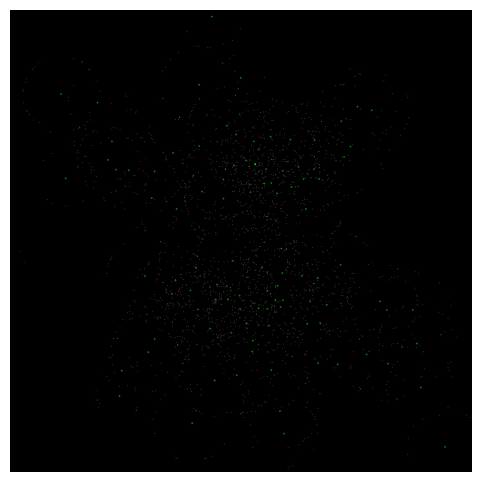

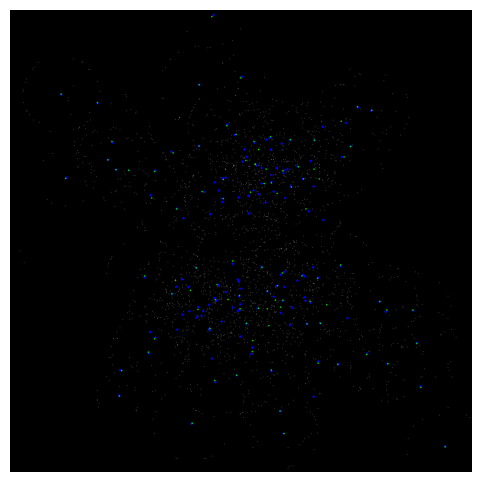

([0.7551020408163265,
  0.8571428571428571,
  0.8571428571428571,
  0.8775510204081632],
 [0.5034013605442177,
  0.5714285714285714,
  0.5714285714285714,
  0.5850340136054422],
 [0.6040816326530613,
  0.6857142857142857,
  0.6857142857142857,
  0.7020408163265306])

In [1]:
import sys

sys.path.append(r'/user/gr1/delphi/dghezzi/KeyPoint_Detection')

import KP as kpl
import numpy as np
from torch import Tensor

image_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/Prova800.jpg'
txt_path = r'/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/Prova800.txt'
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output/weights/last.pt'

results = kpl.inference(image_path, model_path, confidence=0.4, show_image=True, save_image=False)
kpl.show_with_MCpoints(results, image_path, txt_path, show_image=True, save_image=False, img_size=(800, 800))

pred_points = [(float(x), float(y)) for r in results if r.keypoints is not None for kp in r.keypoints.xy for x,y in kp]
gt_points   = np.loadtxt(txt_path, usecols=(-3, -2)) * (800, 800)

pred_points = np.array(pred_points, dtype=float)
gt_points   = np.array(gt_points, dtype=float)

kpl.compute_pck_metrics(pred_points, gt_points, thresholds=[4, 7, 7.6, 8])

# Pesi delle loss
box: 3.0
cls: 0.5
dfl: 0.6
pose: 20.0
kobj: 4.0

==> last.pt @4px: p=0.503, r=0.771, f1=0.609 (confidence=0.4)

In [ ]:
from KP import inference_F1map
model_path = '/user/gr1/delphi/dghezzi/KeyPoint_Detection/SharedDataset/800px/training_output/weights/last.pt'
images_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/images/val'
txt_path = '/user/gr1/delphi/dghezzi/SharedDataset_22500_2500_150_175_npy/YOLO/800px/labels/val'

f1_matrix = inference_F1map(images_path, txt_path, model_path, thresholds=[2, 3, 4, 5, 6, 7, 7.6, 8], conf_thresholds=np.arange(0.2, 0.6, 0.02), img_size=800)

KeyboardInterrupt: 